In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('./mnist/data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [0]:
X = tf.placeholder(tf.float32,[None,n_input])

In [0]:
w_encode = tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,w_encode),b_encode))

In [0]:
w_decode = tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,w_decode),b_decode))

In [0]:
cost = tf.reduce_mean(tf.pow(X -decoder,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
total_batch = int(mnist.train.num_examples / batch_size)
for epoch in range(training_epoch):
  total_cost = 0
  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer,cost],feed_dict={X:batch_xs})
    
    total_cost += cost_val
  print('Epoch : %d'%(epoch+1), 'Avg cost %.4f'%(total_cost/total_batch))

Epoch : 1 Avg cost 0.0682
Epoch : 2 Avg cost 0.0436
Epoch : 3 Avg cost 0.0387
Epoch : 4 Avg cost 0.0356
Epoch : 5 Avg cost 0.0340
Epoch : 6 Avg cost 0.0328
Epoch : 7 Avg cost 0.0322
Epoch : 8 Avg cost 0.0318
Epoch : 9 Avg cost 0.0314
Epoch : 10 Avg cost 0.0309
Epoch : 11 Avg cost 0.0304
Epoch : 12 Avg cost 0.0302
Epoch : 13 Avg cost 0.0301
Epoch : 14 Avg cost 0.0300
Epoch : 15 Avg cost 0.0299
Epoch : 16 Avg cost 0.0298
Epoch : 17 Avg cost 0.0297
Epoch : 18 Avg cost 0.0297
Epoch : 19 Avg cost 0.0296
Epoch : 20 Avg cost 0.0292


In [0]:
n = 4
canvas_orig = np.empty((28*n,28*n))
canvas_recon = np.empty((28*n,28*n))
for i in range(n):
  batch_x,_ = mnist.test.next_batch(n)
  g = sess.run(decoder,feed_dict={X:batch_x})
  
  for j in range(n):
    canvas_orig[i*28:(i+1)*28,j*28:(j+1)*28] = batch_x[j].reshape([28,28])
    
  for j in range(n):
    canvas_recon[i*28:(i+1)*28,j*28:(j+1)*28] = g[j].reshape([28,28])

Original Images


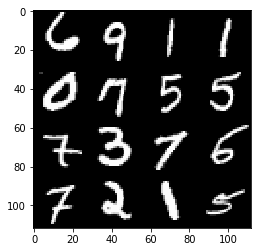

In [0]:
print('Original Images')
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig,origin='upper',cmap='gray')
plt.show()

Reconstructed Images


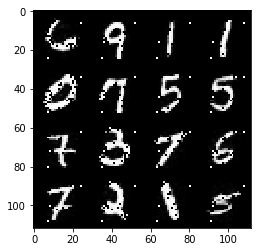

In [0]:
print('Reconstructed Images')
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon,origin='upper',cmap='gray')
plt.show()

In [0]:
X =tf.placeholder(tf.float32,[None,28,28,1])
W1 = tf.Variable(tf.random_normal([5,5,1,32],stddev=0.01))
L1 = tf.nn.conv2d(X,W1,strides=[1,2,2,1],padding='SAME')
L1 = tf.nn.relu(L1)
W_encode = tf.Variable(tf.random_normal([14*14*32,256],stddev=0.01))
L2 = tf.reshape(L1,[-1,14*14*32])
h = tf.matmul(L2,W_encode)

In [0]:
output_batch = tf.shape(X)[0]
deconv_shape = tf.stack([output_batch,28,28,1])
W_decode = tf.Variable(tf.random_normal([256,14*14*32]))
L3 = tf.matmul(h,W_decode)
W3 = tf.Variable(tf.random_normal([5,5,1,32]))
L3 = tf.reshape(L3,[-1,14,14,32])

decoder = tf.nn.conv2d_transpose(L3,W3,output_shape=deconv_shape,strides=[1,2,2,1],padding='SAME')

In [0]:

decoder = tf.nn.sigmoid(decoder)
cost = tf.reduce_mean(tf.pow(X -decoder,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
total_batch = int(mnist.train.num_examples/batch_size)
for epoch in range(training_epoch):
  total_cost = 0
  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    _,cost_val,o_batch_num = sess.run([optimizer,cost,output_batch],feed_dict={X:batch_xs.reshape(-1,28,28,1)})
    total_cost +=cost_val
#     print('output_batchnum : %d'%(o_batch_num))
  print('Epoch : %d'%(epoch+1), 'Avg cost %.4f'%(total_cost/total_batch))

Epoch : 1 Avg cost 0.0251
Epoch : 2 Avg cost 0.0093
Epoch : 3 Avg cost 0.0059
Epoch : 4 Avg cost 0.0046
Epoch : 5 Avg cost 0.0041
Epoch : 6 Avg cost 0.0040
Epoch : 7 Avg cost 0.0037
Epoch : 8 Avg cost 0.0036
Epoch : 9 Avg cost 0.0034
Epoch : 10 Avg cost 0.0031
Epoch : 11 Avg cost 0.0028
Epoch : 12 Avg cost 0.0026
Epoch : 13 Avg cost 0.0024
Epoch : 14 Avg cost 0.0022
Epoch : 15 Avg cost 0.0021
Epoch : 16 Avg cost 0.0020
Epoch : 17 Avg cost 0.0019
Epoch : 18 Avg cost 0.0019
Epoch : 19 Avg cost 0.0018
Epoch : 20 Avg cost 0.0018


Original Images


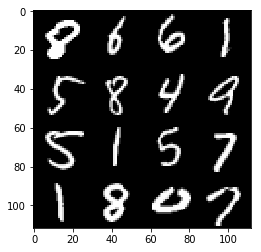

Reconstructed Images


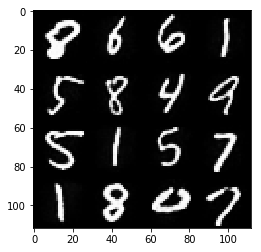

In [0]:
n = 4
canvas_orig = np.empty((28*n,28*n))
canvas_recon = np.empty((28*n,28*n))
for i in range(n):
  batch_x,_ = mnist.test.next_batch(n)
  g = sess.run(decoder,feed_dict={X:batch_x.reshape(-1,28,28,1)})
  
  for j in range(n):
    canvas_orig[i*28:(i+1)*28,j*28:(j+1)*28] = batch_x[j].reshape([28,28])
    
  for j in range(n):
    canvas_recon[i*28:(i+1)*28,j*28:(j+1)*28] = g[j].reshape([28,28])
    
print('Original Images')
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig,origin='upper',cmap='gray')
plt.show()

print('Reconstructed Images')
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon,origin='upper',cmap='gray')
plt.show()